# Graph class tests

In [1]:
from mc_graph import mc_graph
import numpy as np
%load_ext autoreload
%autoreload 2

## regular graph

In [2]:
g = mc_graph()
g.generate_regular(4,6)

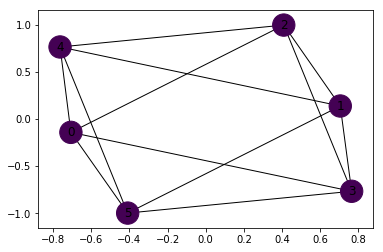

In [3]:
g.plot()

In [4]:
g.get_edges()

EdgeView([(0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (3, 5), (4, 5)])

## square graph

In [5]:
g = mc_graph()
g.generate_list([(1,2),(2,3),(3,4),(4,1)])

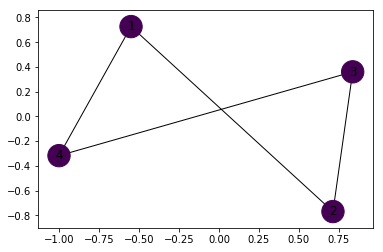

EdgeView([(1, 2), (1, 4), (2, 3), (3, 4)])

In [6]:
g.plot()
g.get_edges()

## house graph

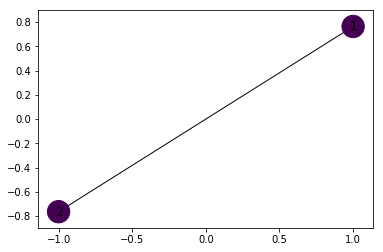

EdgeView([(1, 2)])

In [7]:
g = mc_graph()
g.generate_list([(1,2)])
g.plot()
g.get_edges()

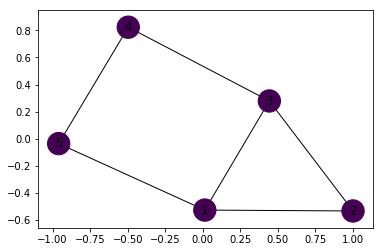

EdgeView([(1, 2), (1, 3), (1, 5), (2, 3), (3, 4), (4, 5)])

In [8]:
g = mc_graph()
g.generate_list([(1,2),(2,3),(3,4),(4,5),(5,1),(1,3)])
g.plot()
g.get_edges()

# MAX_CUT tests

In [9]:
from max_cut import max_cut

### we use the 'house graph' for the following optimizations

In [10]:
mc = max_cut(g)

In [11]:
print(mc.get_clauses())

[[1, 2], [1, 3], [1, 5], [2, 3], [3, 4], [4, 5]]


### global optimization surface for p=1

In [12]:
mc.solve_qaoa_lattice(20, 1)

5 [[1, 2], [1, 3], [1, 5], [2, 3], [3, 4], [4, 5]]


ValueError: inconsistent shapes

### global optimizations for p = 1,2,3,4

In [13]:
solution, measure = mc.solve_qaoa_minimization('SLSQP', 1)
print(solution)
print(measure['measure'])

ValueError: inconsistent shapes

In [14]:
solution, measure = mc.solve_qaoa_minimization('SLSQP', 2)
print(solution)
print(measure['measure'])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -8.414317605391135
            Iterations: 20
            Function evaluations: 148
            Gradient evaluations: 20
     fun: -8.414317605391135
     jac: array([5.96046448e-07, 3.57627869e-07, 1.19209290e-07, 4.76837158e-07])
 message: 'Optimization terminated successfully.'
    nfev: 148
     nit: 20
    njev: 20
  status: 0
 success: True
       x: array([-0.65398918,  0.78414088, -2.28830597,  2.74994045])
{'10001': 3294, '11101': 107, '00000': 86, '11010': 10779, '10101': 5508, '01111': 265, '11110': 109, '00110': 3361, '11000': 928, '10011': 888, '01100': 851, '10010': 10724, '01010': 5579, '11011': 263, '01101': 10965, '11111': 99, '11001': 3326, '10111': 430, '00010': 99, '01000': 424, '11100': 356, '00111': 891, '01011': 7397, '10100': 7386, '01001': 5468, '10000': 246, '01110': 3331, '00001': 99, '00100': 274, '00011': 373, '10110': 5322, '00101': 10772}


In [15]:
solution, measure = mc.solve_qaoa_minimization('SLSQP', 3)
print(solution)
print(measure['measure'])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -8.45803025990393
            Iterations: 29
            Function evaluations: 285
            Gradient evaluations: 29
     fun: -8.45803025990393
     jac: array([ 2.38418579e-07, -1.19209290e-07,  0.00000000e+00,  2.38418579e-07,
        1.07288361e-06,  1.19209290e-07])
 message: 'Optimization terminated successfully.'
    nfev: 285
     nit: 29
    njev: 29
  status: 0
 success: True
       x: array([ 2.81431651,  2.18926953, -0.5558354 ,  0.74482988,  3.14087707,
        0.69454199])
{'10001': 2166, '11101': 76, '00000': 1, '11010': 10711, '10101': 3207, '01111': 756, '11110': 69, '11000': 1256, '10011': 1257, '01100': 1236, '00110': 2113, '01010': 3049, '11011': 745, '01101': 10944, '11111': 1, '11001': 2212, '10111': 633, '00010': 91, '01000': 661, '11100': 148, '00111': 1233, '01011': 12693, '10100': 12661, '01001': 3147, '10000': 703, '01110': 2171, '00001': 85, '00100': 758, '00011': 1

In [16]:
solution, measure = mc.solve_qaoa_minimization('SLSQP', 4)
print(solution)
print(measure['measure'])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -9.393606854563513
            Iterations: 61
            Function evaluations: 711
            Gradient evaluations: 61
     fun: -9.393606854563513
     jac: array([ 3.57627869e-07,  5.96046448e-07,  1.43051147e-06,  1.43051147e-06,
       -7.15255737e-07,  3.57627869e-07,  5.96046448e-07,  4.76837158e-07])
 message: 'Optimization terminated successfully.'
    nfev: 711
     nit: 61
    njev: 61
  status: 0
 success: True
       x: array([ 0.95249754, -0.26533442,  3.22511372,  0.20925925,  0.81380772,
       -0.68352957,  0.53918363,  1.268258  ])
{'10001': 30, '11101': 105, '00000': 102, '11010': 19274, '10101': 2786, '01111': 429, '11110': 95, '11000': 23, '10011': 33, '01100': 35, '00110': 28, '01010': 2899, '11011': 430, '01101': 19079, '11111': 105, '10111': 230, '11001': 22, '00010': 98, '01000': 183, '11100': 605, '00111': 30, '01011': 4137, '10100': 4178, '01001': 2848, '10000': 416, '

In [21]:
solution, measure = mc.solve_qaoa_minimization('SLSQP', 5)
print(solution)
print(measure['measure'])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -9.510658768424909
            Iterations: 71
            Function evaluations: 974
            Gradient evaluations: 71
     fun: -9.510658768424909
     jac: array([ 1.54972076e-06,  5.96046448e-07,  1.19209290e-07,  7.15255737e-07,
       -1.19209290e-07, -3.57627869e-07,  1.19209290e-07,  2.38418579e-07,
        5.96046448e-07, -3.57627869e-07])
 message: 'Optimization terminated successfully.'
    nfev: 974
     nit: 71
    njev: 71
  status: 0
 success: True
       x: array([ 0.81713637,  1.29539279,  2.51984603, -0.44629352, -1.55641601,
        0.88663287,  2.91996646,  0.99497784,  1.2523407 , -0.96683095])
{'10001': 29, '11101': 210, '00000': 31, '11010': 20265, '10101': 2592, '01111': 319, '11110': 236, '11000': 78, '10011': 87, '01100': 86, '00110': 26, '01010': 2618, '11011': 275, '01101': 20076, '11111': 25, '10111': 58, '11001': 24, '00010': 234, '01000': 75, '11100': 273, '00111':

In [22]:
solution, measure = mc.solve_qaoa_minimization('SLSQP', 6)
print(solution)
print(measure['measure'])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -9.890946302146478
            Iterations: 90
            Function evaluations: 1419
            Gradient evaluations: 90
     fun: -9.890946302146478
     jac: array([ 4.76837158e-07,  2.38418579e-07,  3.57627869e-07, -5.96046448e-07,
        0.00000000e+00,  1.19209290e-07,  7.15255737e-07,  2.38418579e-07,
        1.19209290e-06, -1.19209290e-07,  7.15255737e-07,  0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1419
     nit: 90
    njev: 90
  status: 0
 success: True
       x: array([ 0.89656023, -0.24357198, -1.66624164,  0.83933322, -1.11628239,
        0.39462632,  1.73912248, -0.36883163,  1.29680386, -0.57883257,
        1.08238624, -0.39758074])
{'10001': 119, '11101': 7, '00000': 39, '11010': 24301, '10101': 96, '01111': 74, '11110': 5, '11000': 63, '10011': 55, '01100': 61, '00110': 134, '01010': 77, '11011': 79, '01101': 24133, '11111': 55, '11001': 113, 

# QAOA tests

In [17]:
from qaoa import qaoa

In [18]:
qc = qaoa(mc.get_nodes(), mc.get_clauses())

In [19]:
qc.build_operator()
H = qc.H.todense()

In [20]:
import scipy
scipy.linalg.eig(H)

(array([ 0.+0.j,  4.+0.j,  4.+0.j,  4.+0.j,  6.+0.j, 10.+0.j,  6.+0.j,
         6.+0.j,  4.+0.j,  8.+0.j,  8.+0.j,  8.+0.j,  6.+0.j, 10.+0.j,
         6.+0.j,  6.+0.j,  6.+0.j,  6.+0.j, 10.+0.j,  6.+0.j,  8.+0.j,
         8.+0.j,  8.+0.j,  4.+0.j,  6.+0.j,  6.+0.j, 10.+0.j,  6.+0.j,
         4.+0.j,  4.+0.j,  4.+0.j,  0.+0.j]),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]))